<a href="https://colab.research.google.com/github/ADI33352/Data-science-material/blob/main/Handling_missing_data_cca_analysisipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_science_job.csv')

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [5]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In Cca anlysis if data has less then 5  pecent of missing data then we can drop the row for a random state but conditioned to no effect of dataset range

In [3]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [4]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
855,NaN,no_enrollment,Graduate,3.0,9.0
10359,0.920,no_enrollment,Masters,10.0,57.0
11420,0.836,Full time course,Graduate,3.0,11.0
17366,0.624,no_enrollment,Graduate,2.0,NaN
7433,0.624,Full time course,Graduate,5.0,164.0


In [9]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [10]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [5]:
new_df = df[cols].dropna()

In [12]:

df.shape

(19158, 13)

In [13]:
new_df.shape

(17182, 5)

<AxesSubplot:>

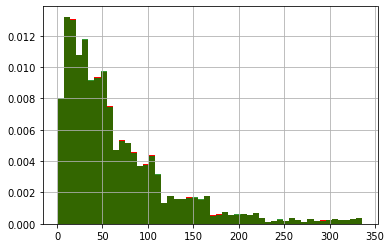

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

In [15]:
new_df.columns

Index(['city_development_index', 'enrolled_university', 'education_level',
       'experience', 'training_hours'],
      dtype='object')

<AxesSubplot:>

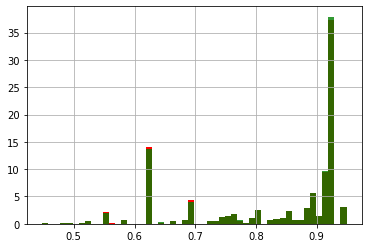

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

overlap means not much effect on data so missing values can be dropped easily 

In [10]:
temp = pd.concat([
     # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),
     # percentage of observations per category, new data
            df['enrolled_university'].value_counts() / len(new_df),

],axis=1)

In [11]:
temp.columns = ['orignal','cca']

In [12]:
temp

,orignal,cca
no_enrollment,0.721213,0.804156
Full time course,0.196106,0.218659
Part time course,0.062533,0.069724


In [13]:
temp1 = pd.concat([
     # percentage of observations per category, original data
            df['training_hours'].value_counts() / len(df),
     # percentage of observations per category, new data
            df['training_hours'].value_counts() / len(new_df),

],axis=1)

In [14]:
temp1.columns= ['orignal','cca']

In [15]:
temp1

,orignal,cca
28.0,0.016703,0.018624
18.0,0.014563,0.016238
12.0,0.014563,0.016238
22.0,0.014250,0.015889
50.0,0.014041,0.015656
...,...,...
272.0,0.000261,0.000291
240.0,0.000261,0.000291
234.0,0.000261,0.000291
238.0,0.000209,0.000233
